<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/Python_Data_Analysis_PART_III_Data_Visualization_with_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <<  Data Analysis with Python - PART III >> 
# Data Visualizatu with `matplotlib`
**C. Alex Hu @ 2021/05/24**

**[  Reference ] :**

1. **Matplotlib - Tutorials :** https://matplotlib.org/tutorials/index.html
      + [ Code ] => Github : https://github.com/matplotlib/matplotlib
 
 
2. **Jake VanderPlas, "Python Data Science Handbook", Ch. 4 "Visualization with Matplotlib", O'Reilly, 2017.** 
https://github.com/jakevdp/PythonDataScienceHandbook


3. **Seaborn: statistical data visualization - User guide and tutorial** 
 http://seaborn.pydata.org/tutorial.html

## Data Visualization with `matplotlib`
### CONTENT:

   - [1. Pyplot](#Pyplot)
   - [2. Animated Plots](#Animated_Plots)
   - [3. 3D Plots](#3D_Plots)
   - [4. Images](#Images)

<a id='Pyplot'></a>
## 1. Pyplot

 - An introduction to the pyplot interface.

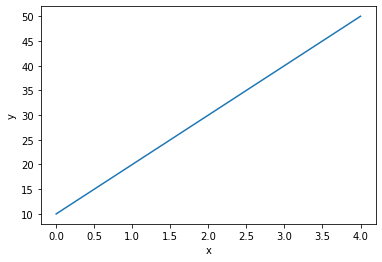

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([10, 20, 30, 40, 50])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

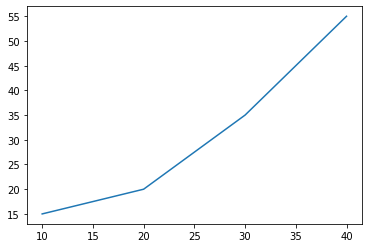

In [ ]:
# 2-dataset plotting...

plt.plot([10, 20, 30, 40], [15, 20, 35, 55]);

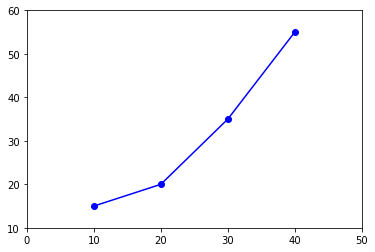

In [ ]:
# a color string + a marker style + a line style string, 
# e.g., 'b-': a solid blue line.

plt.plot([10, 20, 30, 40], [15, 20, 35, 55], 'bo-')
plt.axis([0, 50, 10, 60])
plt.show()

+ ### Plotting NumPy Arrays...

In [ ]:
import numpy as np

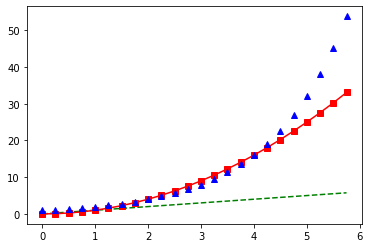

In [ ]:
# evenly sampled time at 250ms intervals
x = np.arange(0., 6., 0.25)

# green dashes, red squares solid and blue triangles 
plt.plot(x, x, 'g--', x, x**2, 'rs-', x, 2**x, 'b^')
plt.show()

+ ### Plotting with keyword strings...
-----------
    matplotlib.pyplot.scatter(x, y, s=None, c=None, 
                              marker=None, cmap=None, 
                              norm=None, vmin=None, 
                              vmax=None, alpha=None, 
                              linewidths=None, *, 
                              edgecolors=None, 
                              plotnonfinite=False, 
                              data=None, **kwargs)

   **[ Ref ]: `matplotlib.pyplot.scatter`:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

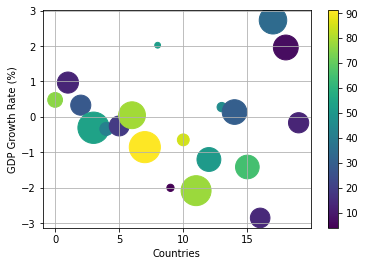

In [ ]:
# Plotting with keyword strings...
covid_19 = {'Countries': np.arange(20),
            'GDP Growth Rate': np.random.randn(20),
            'Vaccined': np.random.randint(0, 100, 20).astype('float'),
            'Population': 1000 * np.random.rand(20)}

# [Note]: `matplotlib.pyplot.scatter`
#         cmap is only used if c is an array of floats.
#         (default: 'viridis')
plt.scatter('Countries', 'GDP Growth Rate', 
            c='Vaccined', s='Population', 
            cmap='viridis', data=covid_19)
plt.xlabel('Countries')
plt.ylabel('GDP Growth Rate (%)')
plt.grid()
plt.colorbar()
plt.show()

+ ### Plotting with categorical variables...

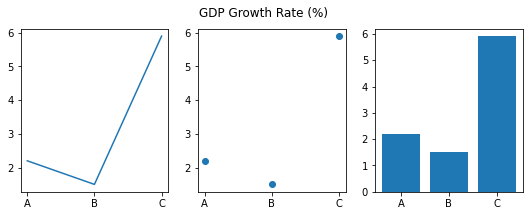

In [ ]:
# Plotting with categorical variables...
countries = ['A', 'B', 'C']
GDP_GR = [2.2, 1.5, 5.9]

plt.figure(1, figsize=(9, 3))
plt.subplot(133)
plt.bar(countries, GDP_GR)
plt.subplot(132)
plt.scatter(countries, GDP_GR)
plt.subplot(131)
plt.plot(countries, GDP_GR)
plt.suptitle('GDP Growth Rate (%)')
plt.show()

+ **[NOTE]:** *Controlling line properties, referred to `[Ref. 1]`.*

+ ### Working with multiple figures and axes...

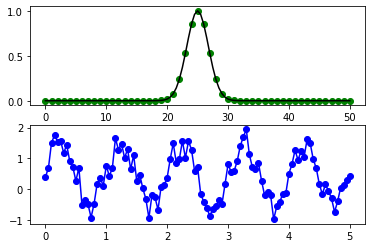

In [ ]:
def f(t):
    mu = np.mean(t)
    return np.exp(-(t-mu)**2/(2*np.pi))

t1 = np.arange(0.0, 51.0, 1)     #  51 points
t2 = np.arange(0.0, 50.5, 0.5)   # 101 points

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'go', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2/10, np.sin(2*np.pi*t2/10) + np.random.rand(101), 'bo-')
plt.show()

+ ### Plotting logarithmic axes

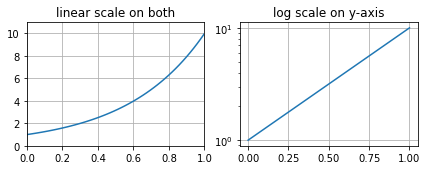

In [ ]:
# Logarithmic axes
x = np.linspace(0, 1)
y = np.power(10, x)    # y = np.exp(x)

plt.figure(1, [7,5])

# linear plot
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear scale on both')
plt.axis([0, 1, 0, 11])
plt.grid(True);

# log-scale plot
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log scale on y-axis')
plt.grid(True)
plt.show()

+ ### Adding mathematical expressions in text & Annotating text

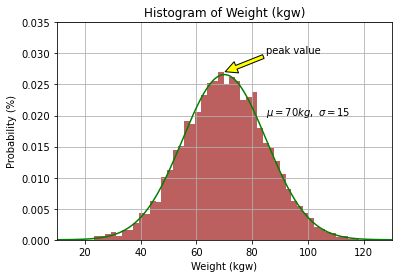

In [ ]:
from scipy.stats import norm

# Working with text...
mu, sigma = 70, 15
x = mu + sigma * np.random.randn(5000)

# the histogram of the data
plt.hist(x, 50, density=1, facecolor='brown', alpha=0.75)
plt.xlabel('Weight (kgw)')
plt.ylabel('Probability (%)')
plt.title('Histogram of Weight (kgw)')
# Adding the text to the figure...
plt.text(85, .02, r'$\mu=70 kg,\ \sigma=15$')

# Plot the normal distribution...
x_axis = np.arange(10, 130, 0.01)
# Adding an anotation to the figure...
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), 'g')
plt.annotate('peak value', xy=(70, 0.027), xytext=(85, 0.03),
             arrowprops=dict(facecolor='yellow', shrink=0.02))

plt.axis([10, 130, 0, 0.035])
plt.grid(True)
plt.show()

<a id='Animated_Plots'></a>
## 2. Animated Plots

+ ### [ Paradigm ]: Animated histogram

> **[Ref]: Animated histogram -**
https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

# Fixing random seed...
np.random.seed(20210524)

# Fixing bin edges: 0:00am ~ 12:00pm
bins = np.linspace(0, 12, 100)

# histogram for the numpy data...
loc, scale, size = 8, 1, 1000
traffic = np.random.normal(loc=8, scale=1, size=1000) 
n, _ = np.histogram(traffic, bins)

+ **Creating the traffic flows for 100 days**

In [ ]:
def pre_animation(bar_container, loc=8, scale=1, size=1000):  
    def animate(frames):
        # Traffic-flow data simulation for each day...
        traffic = np.random.normal(loc, scale, size)  
        n, _ = np.histogram(traffic, bins)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

+ **Animating the traffic flows**

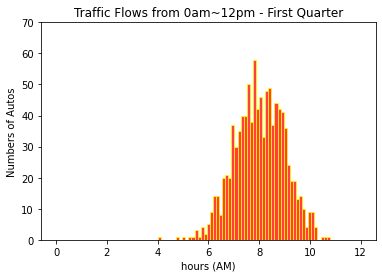

In [ ]:
fig, ax = plt.subplots()
n, _, bars = ax.hist(traffic, bins, lw=1,
                              ec="yellow", fc="red", alpha=0.75)
ax.set_ylim(top=70)  # setting y-axis limit 
plt.title('Traffic Flows from 0am~12pm - First Quarter')
plt.ylabel('Numbers of Autos')
plt.xlabel('hours (AM)')

# A 100-day-traffic-flow animation ...
ani = animation.FuncAnimation(fig, 
                              pre_animation(bars, loc, scale, size), 
                              frames=100, repeat=False, blit=True)

HTML(ani.to_jshtml())

<a id='3D_Plots'></a>
## 3. 3D Plots

> **[Ref]: `mplot3d` tutorial -**
https://matplotlib.org/2.0.2/mpl_toolkits/mplot3d/tutorial.html

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

+ **Line Plots**

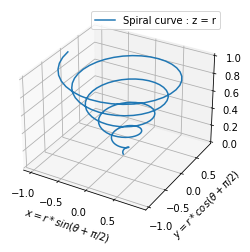

In [ ]:
# Setting the legend font size...
mpl.rcParams['legend.fontsize'] = 10 

fig = plt.figure()
ax = fig.gca(projection='3d')
num = 180
theta = np.linspace(-5*np.pi, 5*np.pi, num)
z = np.linspace(0, 1, num)
r = z
x = r * np.sin(theta + np.pi/2)
y = r * np.cos(theta + np.pi/2)

ax.plot(x, y, z, label='Spiral curve : z = r')
plt.xlabel(r'$x = r*sin(\theta + \pi/2)$')
plt.ylabel(r'$y = r*cos(\theta + \pi/2)$')
ax.legend()
plt.show()

+ **Scatter Plots**

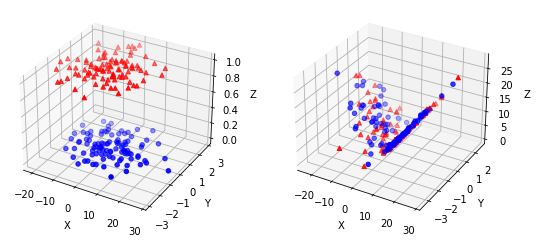

In [ ]:
fig = plt.figure(1, [9, 4])
num = 100

ax = fig.add_subplot(121, projection='3d')
for i in range(2):
    xs = np.random.randn(num) * 10
    ys = np.random.randn(num) 
    zs = i
    ax.scatter(xs, ys, zs, 
               c='b' if i == 0 else 'r', 
               marker='o' if i == 0 else '^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax = fig.add_subplot(122, projection='3d')
for i in range(2):
    xs = np.random.randn(num) * 10
    ys = np.random.randn(num) 
    zs = np.sqrt(xs**2 + ys**2)
    ax.scatter(xs, ys, zs, 
               c='b' if i == 0 else 'r', 
               marker='o' if i == 0 else '^')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

+ **Surface Plots**

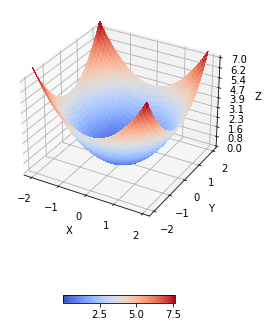

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(1, [4,8])
ax = fig.gca(projection='3d')

X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2      # Creating a paraboloid...

# Plotting the surface...
surf_plot = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Setting the z range...
ax.set_zlim(0, 7)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

# Adding a color bar...
fig.colorbar(surf_plot, shrink=0.5, aspect=15, 
             orientation='horizontal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

<a id='Images'></a>
## 4. Images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

+ ### Importing the image data...

> - Importing image data, `stinkbug.png`, into Numpy arrays: https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png
>
>
> - A 24-bit `RGB` PNG image (8 bits for each of R, G, B channels). 
> 
>
> - **[NOTE] :**
     + Natively, Matplotlib only supports PNG images.
     + `RGBA` images, which allow for transparency, or single-channel grayscale (luminosity) images.  

In [ ]:
image_url = 'https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png'
image = mpimg.imread(image_url)
image

array([[[0.40784314, 0.40784314, 0.40784314],
        [0.40784314, 0.40784314, 0.40784314],
        [0.40784314, 0.40784314, 0.40784314],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098]],

       [[0.4117647 , 0.4117647 , 0.4117647 ],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        ...,
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098],
        [0.42745098, 0.42745098, 0.42745098]],

       [[0.41960785, 0.41960785, 0.41960785],
        [0.41568628, 0.41568628, 0.41568628],
        [0.41568628, 0.41568628, 0.41568628],
        ...,
        [0.43137255, 0.43137255, 0.43137255],
        [0.43137255, 0.43137255, 0.43137255],
        [0.43137255, 0.43137255, 0.43137255]],

       ...,

       [[0.4392157 , 0.4392157 , 0.4392157 ],
        [0.43529412, 0.43529412, 0.43529412],
        [0.43137255, 0

### [ Note ] :
- The dtype there - float32.  
- #### Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0.  
- Matplotlib plotting can handle float32 and uint8, but image reading/writing for any format other than PNG is limited to uint8 data.
- #### Each inner list represents a pixel.
- Since it's a black and white image, R, G, and B are all similar.  
 
- **For RGB and RGBA images, matplotlib supports float32 and uint8 data types.**  
- **For grayscale, matplotlib supports only float32.**

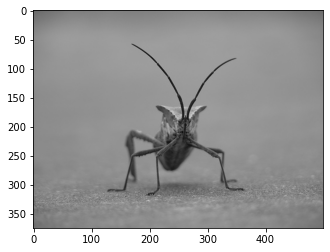

In [ ]:
imgplot = plt.imshow(image)

+ ### Plotting any numpy array...

+ #### Applying pseudocolor schemes to image plots
> - Pseudocolor => enhancing contrast to visualize your data more easily.
> - Pseudocolor is only for single-channel, grayscale, luminosity images.  


In [ ]:
image[:, :, 0]   # It is only one-channel data.

array([[0.40784314, 0.40784314, 0.40784314, ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.4117647 , 0.4117647 , 0.4117647 , ..., 0.42745098, 0.42745098,
        0.42745098],
       [0.41960785, 0.41568628, 0.41568628, ..., 0.43137255, 0.43137255,
        0.43137255],
       ...,
       [0.4392157 , 0.43529412, 0.43137255, ..., 0.45490196, 0.4509804 ,
        0.4509804 ],
       [0.44313726, 0.44313726, 0.4392157 , ..., 0.4509804 , 0.44705883,
        0.44705883],
       [0.44313726, 0.4509804 , 0.4509804 , ..., 0.44705883, 0.44705883,
        0.44313726]], dtype=float32)

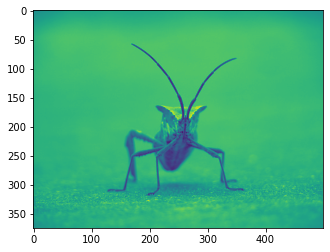

In [ ]:
img1 = image[:, :, 0]  # It is only one-channel data.
plt.imshow(img1)

In [ ]:
print(image.shape)
print(img1.shape)

(375, 500, 3)
(375, 500)


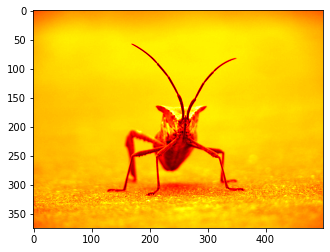

In [ ]:
# The default colormap: 'viridis'  
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(img1, cmap="hot")

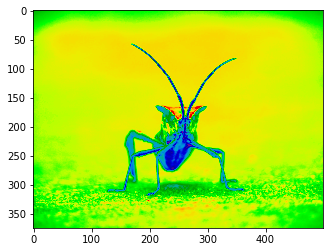

In [ ]:
imgplot = plt.imshow(img1)
imgplot.set_cmap('nipy_spectral')

+ ### Adding a Color Bar...

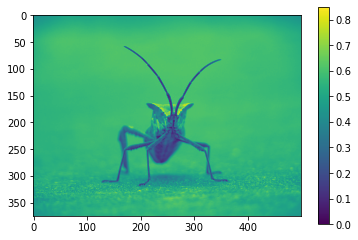

In [ ]:
imgplot = plt.imshow(img1)
plt.colorbar()

+ ### Examining a specific data range...

(array([2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 7.000e+00, 9.000e+00, 7.000e+00, 2.000e+00,
        7.000e+00, 1.000e+01, 1.100e+01, 1.500e+01, 1.400e+01, 2.700e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 3.100e+01, 2.900e+01, 2.800e+01,
        2.400e+01, 2.400e+01, 4.000e+01, 2.600e+01, 5.200e+01, 3.900e+01,
        5.700e+01, 4.600e+01, 8.400e+01, 7.600e+01, 8.900e+01, 8.000e+01,
        1.060e+02, 1.130e+02, 1.120e+02, 9.000e+01, 1.160e+02, 1.090e+02,
        1.270e+02, 1.350e+02, 9.800e+01, 1.310e+02, 1.230e+02, 1.110e+02,
        1.230e+02, 1.160e+02, 1.010e+02, 1.170e+02, 1.000e+02, 1.010e+02,
        9.000e+01, 1.060e+02, 1.260e+02, 1.040e+02, 1.070e+02, 1.110e+02,
        1.380e+02, 1.000e+02, 1.340e+02, 1.210e+02, 1.400e+02, 1.320e+02,
        1.390e+02, 1.160e+02, 1.330e+02, 1.180e+02, 1.080e+02, 1.170e+02,
        1.280e+02, 1.200e+02, 1.210e+02, 1.100e+02, 1.160e+02, 1.180e+02,
        9.700e+01, 9.700e+01, 1.140e+0

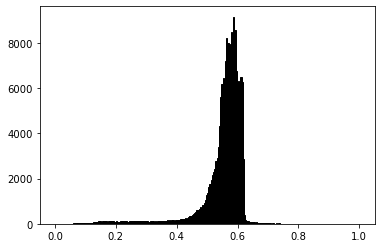

In [ ]:
# Examining a specific data range with a histogram plot...
plt.hist(img1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

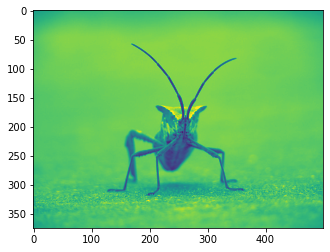

In [ ]:
imgplot = plt.imshow(img1, clim=(0.0, 0.75))

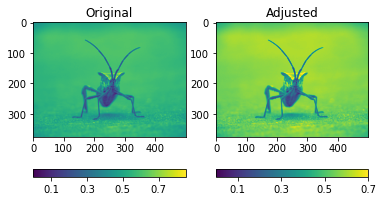

In [ ]:
def plots():
    fig = plt.figure()
    for i in range(2):
        a = fig.add_subplot(1, 2, i+1)
        imgplot = plt.imshow(img1)
        
        if i == 0:
            a.set_title('Original')
        else:
            a.set_title('Adjusted')
            imgplot.set_clim(0.0, 0.7) # setting the color limit
            
        plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], 
                     orientation='horizontal')

plots()

+ ### Download the image file from Web...

In [ ]:
import requests

# image_url = 'https://raw.githubusercontent.com/matplotlib/matplotlib/master/doc/_static/stinkbug.png'
img_data = requests.get(image_url).content
with open('stinkbug.png', 'wb') as handler:
    handler.write(img_data)

+ ### Using the `Pillow` library to resize the image...

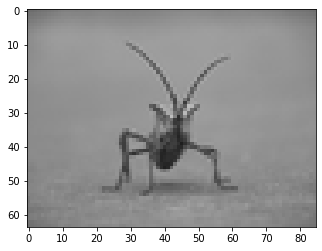

In [ ]:
from PIL import Image

img2 = Image.open('stinkbug.png')
img2.thumbnail((128, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img2)

+ ### Array Interpolation schemes


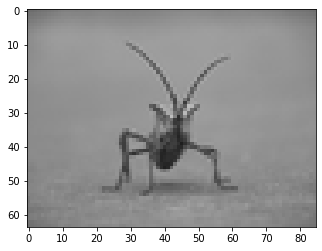

In [ ]:
# "nearest" : no interpolation.
imgplot = plt.imshow(img2, interpolation="nearest")

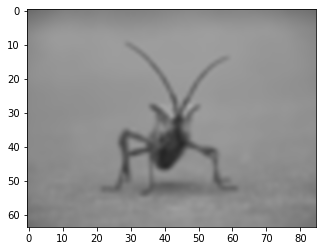

In [ ]:
# Bicubic interpolation tends to prefer blurry over pixelated.
imgplot = plt.imshow(img2, interpolation="bicubic")